In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

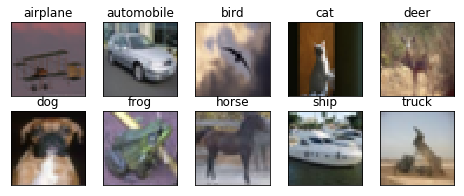

In [33]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0627 15:41:26.225770 140414435755904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0627 15:41:26.263654 140414435755904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 15:41:26.271389 140414435755904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_233 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_237 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_238 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_222 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 15, 15, 96)        41568     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0625 06:18:24.729695 139855843239808 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 26s 68ms/step - loss: 1.8484 - acc: 0.2967 - val_loss: 1.4240 - val_acc: 0.4682
Epoch 2/100
390/390 [==============================] - 20s 52ms/step - loss: 1.3571 - acc: 0.5045 - val_loss: 1.1256 - val_acc: 0.5875
Epoch 3/100
390/390 [==============================] - 20s 51ms/step - loss: 1.1360 - acc: 0.5958 - val_loss: 0.9432 - val_acc: 0.6626
Epoch 4/100
390/390 [==============================] - 20s 51ms/step - loss: 0.9823 - acc: 0.6533 - val_loss: 0.8501 - val_acc: 0.7060
Epoch 5/100
390/390 [==============================] - 20s 51ms/step - loss: 0.8793 - acc: 0.6952 - val_loss: 0.7716 - val_acc: 0.7360
Epoch 6/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7997 - acc: 0.7251 - val_loss: 0.7536 - val_acc: 0.7440
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7395 - acc: 0.7456 - val_loss: 0.6967 - val_acc: 0.7614
Epoch 8/100
390/390 [==============================] - 

In [10]:
# Define the model
from keras import regularizers
from keras.layers import AveragePooling2D

model = Sequential()

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.0001), border_mode='same', input_shape=(32, 32, 3))) # 32, 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 32, 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(16, 1, 1, kernel_regularizer=regularizers.l2(0.0001))) # 30, 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(MaxPooling2D(pool_size=(2, 2))) # 30, 7

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001))) # 15, 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 15 , 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

# model.add(MaxPooling2D(pool_size=(2, 2))) # 10, 18
# model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001))) # 13 , 18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(64, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 13, 20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
          
model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.0001))) # 11, 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
          
model.add(Convolution2D(128, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 11, 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
          
model.add(Convolution2D(128, 3, 3, kernel_regularizer=regularizers.l2(0.0001), border_mode='same')) # 9, 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(256, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 9, 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Convolution2D(256, 3, 3, kernel_regularizer=regularizers.l2(0.0001))) # 7, 28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
          
        
model.add(Convolution2D(10, 1, 1)) # 5, 28

model.add(AveragePooling2D(pool_size=(5,5)))
          
model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0628 13:49:11.482705 140331155326848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
W0628 13:49:11.506490 140331155326848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 13:49:11.509207 140331155326848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 13:49:11.556990 140331155326848 deprecation_wrapper.py

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
__________

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 30s 76ms/step - loss: 1.5767 - acc: 0.4629 - val_loss: 2.1969 - val_acc: 0.4180

Epoch 00001: val_acc improved from -inf to 0.41800, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-accuracy.h5
Epoch 2/100
390/390 [==============================] - 19s 49ms/step - loss: 1.2210 - acc: 0.6014 - val_loss: 1.5747 - val_acc: 0.5167

Epoch 00002: val_acc improved from 0.41800 to 0.51670, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-accuracy.h5
Epoch 3/100
390/390 [==============================] - 19s 49ms/step - loss: 1.0606 - acc: 0.6619 - val_loss: 1.0972 - val_acc: 0.6550

Epoch 00003: val_acc improved from 0.51670 to 0.65500, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-accuracy.h5
Epoch 4/100
390/390 [==============================] - 19s 48ms/step - loss: 0.9567 - acc: 0.7047 - val_loss: 1.0765 - val_acc: 0.6657

Epoch 00004: val_acc improved from 0.65500 to 0.66570,

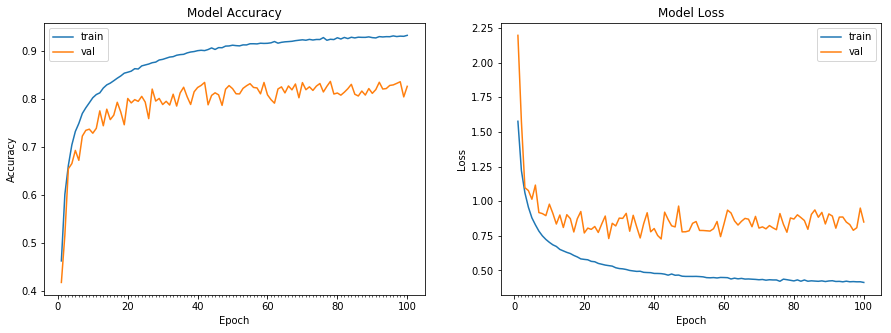

In [0]:

checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/model-best-accuracy.h5', 
                             verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 callbacks = [checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)



In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/model-best-accuracy.h5'
model.load_weights(path)

In [13]:
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.71


In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
import cv2
test = []
test.append(test_features[6000])
test.append(test_features[5600])
test.append(test_features[2000])
test.append(test_features[5000])

In [30]:
heat_img = []

for img in test:
  x = np.expand_dims(img, axis=0)
# x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_13")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(9):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)  
  
  # img = cv2.imread(img_path)
  #print(heatmap.shape)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  # print(heatmap.shape)
  # print(test[0].shape)
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(heatmap.shape)
  print(img.shape)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  # plt.imshow(test[0])
  # plt.imshow(superimposed_img)
  heat_img.append(superimposed_img)
        
    

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


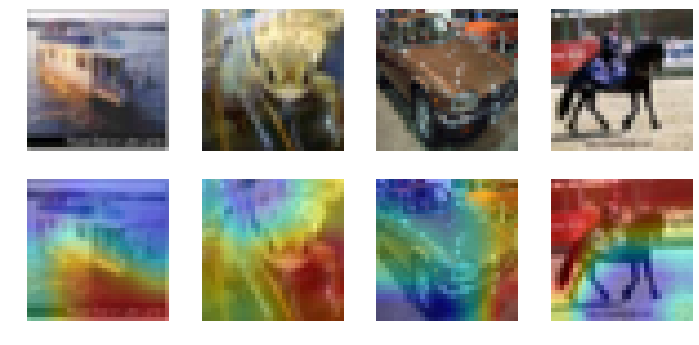

In [31]:
plt.figure(figsize=(12, 12))

new = test + heat_img

for i in range(8):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(new[i])
  plt.axis('off')
  

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app
W0627 15:42:16.943903 140414435755904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (

Epoch 1/100
390/390 [==============================] - 24s 61ms/step - loss: 1.7079 - acc: 0.4123 - val_loss: 1.8936 - val_acc: 0.4547

Epoch 00001: val_acc improved from -inf to 0.45470, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-cutout-accuracy.h5
Epoch 2/100
390/390 [==============================] - 18s 47ms/step - loss: 1.3950 - acc: 0.5297 - val_loss: 1.3851 - val_acc: 0.5609

Epoch 00002: val_acc improved from 0.45470 to 0.56090, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-cutout-accuracy.h5
Epoch 3/100
390/390 [==============================] - 18s 46ms/step - loss: 1.2419 - acc: 0.5947 - val_loss: 1.4081 - val_acc: 0.5479

Epoch 00003: val_acc did not improve from 0.56090
Epoch 4/100
390/390 [==============================] - 18s 46ms/step - loss: 1.1356 - acc: 0.6318 - val_loss: 1.2172 - val_acc: 0.6066

Epoch 00004: val_acc improved from 0.56090 to 0.60660, saving model to /content/gdrive/My Drive/Colab Notebooks/model-best-cu

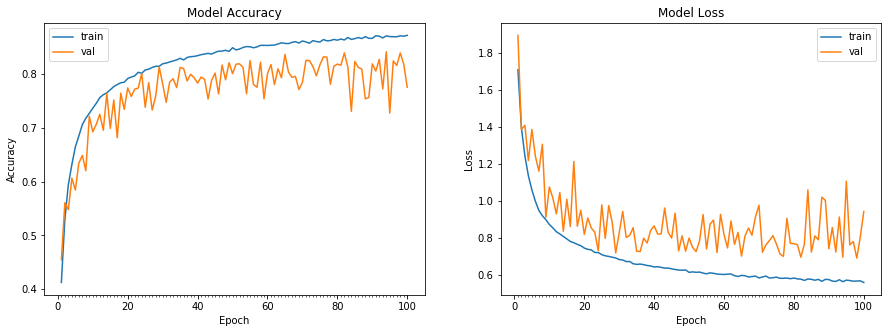

In [0]:
pixel_level = True

checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/model-best-cutout-accuracy.h5', verbose=1, 
                             monitor='val_acc',save_best_only=True, mode='auto')

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False, 
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=pixel_level))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, 
                                 callbacks = [checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)


In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/model-best-cutout-accuracy.h5'
model.load_weights(path)

In [39]:
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 84.19


In [45]:
cutout_img = []

for img in test:
  x = np.expand_dims(img, axis=0)
# x = preprocess_input(x)

  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_12")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(100):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)  
  
  # img = cv2.imread(img_path)
  #print(heatmap.shape)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  # print(heatmap.shape)
  # print(test[0].shape)
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(heatmap.shape)
  print(img.shape)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  # plt.imshow(test[0])
  # plt.imshow(superimposed_img)
  cutout_img.append(superimposed_img)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


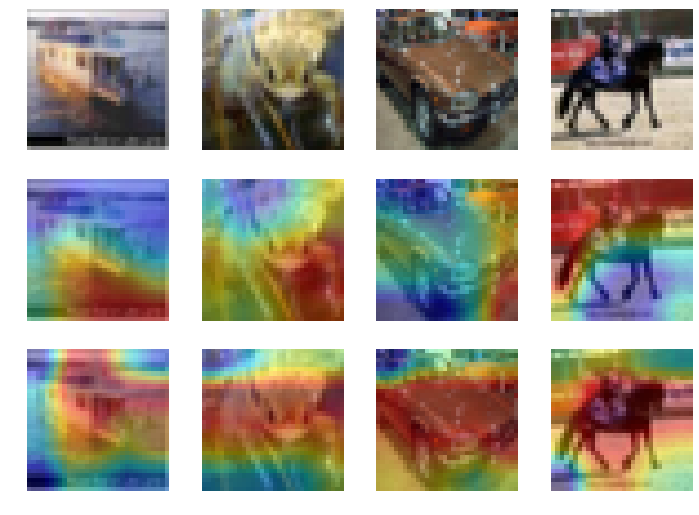

In [46]:
plt.figure(figsize=(12, 12))

new = test + heat_img + cutout_img

for i in range(12):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(new[i])
  plt.axis('off')
  

1. I ran my network for 100 epochs and saved the model which got the highest validation accuracy of 83.71%.
2. Then i applied gradCam on this model, the results you can see it above.
3. Then i retrained the model using cutout and applied gradCam on this model too.